# Chapter 3: Structural Mechanics

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.optimize as opt

## 3.1 Beam on two supports with point load

### Calculating and plotting the moment line

In [136]:
def computeBendingMoment1(x,P,a,b):
    """computes the moment

    Args:
        x (_type_): Position on the beam
        P (_type_): Point load
        a (_type_): Distance from left support to the load
        b (_type_): Distance from the load to the right support

    Returns:
        float: Bending moment at position x
    """

    l = a + b
    # Calculates the bending moment at a single position x
    # for a simply supported beam loaded by a point load P
    # in position x = a for a beam with total length = a + b
    if x < a:
        y = (P * b / l) * x
    else:
        y = (P * b / l) * x - P * (x - a)

    return y

In [137]:
# Evaluate the function
P = 10  # kN (1000 N)
a = 3  # m
b = 2  # m
x = 1  # m

moment = computeBendingMoment1(x, P, a, b)
print(f"The bending moment at x = {x} m is {moment} kNm")

x = 4  # m
moment = computeBendingMoment1(x, P , a, b)
print(f"The bending moment at x = {x} m is {moment} kNm")

The bending moment at x = 1 m is 4.0 kNm
The bending moment at x = 4 m is 6.0 kNm


### Calculating and plotting the moment line via a vector

In [138]:
import numpy as np
import matplotlib.pyplot as plt
def computeBendingMomentN(x: np.array,P,a,b):
    # y = M(x,P,a,b)
    # Calculates the bending moment at positions defined by the x-array
    # for a simply supported beam loaded by a point load P
    # in position x = a for a beam with total length = a + b

    l = a + b
    y = np.zeros_like(x, dtype=float)
    y[x < a] = (P * b / l) * x[x < a]
    y[x >= a] = (P * b / l) * x[x >= a] - P * (x[x >= a] - a)

    return y

The `computeBendingMomentN` function takes a numpy array `x` of positions, the point load `P`, and the distances `a` and `b`. It returns a numpy array `y` containing the bending moments at the corresponding positions. The function calculates the bending moment based on the position relative to the load.

You can experiment with the step size of the input `x` by changing the third argument in `np.linspace(0, l, 100)`. A larger number will create more points, resulting in a smoother plot, while a smaller number will create fewer points.

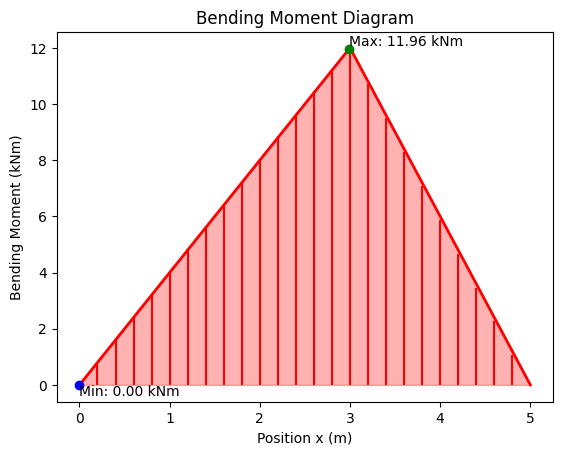

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the function
P = 10  # kN (
a = 3  # m
b = 2  # m
l = a + b
x_values = np.linspace(0, l, 200)  # Create a vector of x positions

moment_values = computeBendingMomentN(x_values, P , a, b)

# Plot the bending moment diagram
plt.figure()
plt.plot(x_values, moment_values, color='red',linewidth = 2) # Change line color to red

# Add vertical red solid lines from y=0 to the curve
# You can choose either 0.3 or 0.5 for the spacing
spacing = 0.2
line_x_positions = np.arange(0, l + spacing, spacing)
# Find the indices in x_values closest to the line_x_positions
indices = np.searchsorted(x_values, line_x_positions)
# Ensure indices are within bounds
indices = np.clip(indices, 0, len(x_values) - 1)
line_y_values = moment_values[indices]

plt.vlines(line_x_positions, 0, line_y_values, color='red')

# Fill the area under the curve with transparent red
plt.fill_between(x_values, moment_values, color='red', alpha=0.3)

# Find and display maximum and minimum values
max_moment = np.max(moment_values)
min_moment = np.min(moment_values)
max_index = np.argmax(moment_values)
min_index = np.argmin(moment_values)
max_x = x_values[max_index]
min_x = x_values[min_index]

plt.plot(max_x, max_moment, 'go') # Mark maximum with a green circle
plt.text(max_x, max_moment, f'Max: {max_moment:.2f} kNm', ha='left', va='bottom')

plt.plot(min_x, min_moment, 'bo') # Mark minimum with a blue circle
plt.text(min_x, min_moment, f'Min: {min_moment:.2f} kNm', ha='left', va='top')


plt.xlabel("Position x (m)")
plt.ylabel("Bending Moment (kNm)")
plt.title("Bending Moment Diagram")

plt.show()

### Calculating and plotting the deflection

In [140]:
import numpy as np

def computeDeflectionN(x : np.array,P,a,b):
    # y = u_z(x,P,a,b)
    # Calculates the vertical displacement EI u_z
    # at positions defined by the x-array
    # for a simply supported beam loaded by a point load P
    # in position x = a for a beam with total length = a + b
    # setting EI = 1

    l = a + b
    EIuz = np.zeros_like(x, dtype=float)

    # Part 1 of the formula: - (P * b / l) * x^3 / 6
    EIuz = EIuz - (P * b / l) * (x**3) / 6

    # Part 2 of the formula: (P * a * b * (l + b) / (6 * l)) * x
    C1 = (P * a * b * (l + b)) / (6 * l)
    EIuz = EIuz + C1 * x

    # Part 3 of the formula: conditional term
    EIuz[x >= a] = EIuz[x >= a] + (P * (x[x >= a] - a)**3) / 6

    return EIuz

The `computeDeflectionN` function calculates the vertical displacement multiplied by EI (`EIuz`) for a simply supported beam with a point load. It takes a numpy array of positions `x`, the point load `P`, and the distances `a` and `b`. The output is a numpy array containing the corresponding `EIuz` values.

You can experiment with the step size of the input `x` by changing the third argument in `np.linspace(0, l, 100)`. A larger number will create more points, resulting in a smoother plot, while a smaller number will create fewer points.

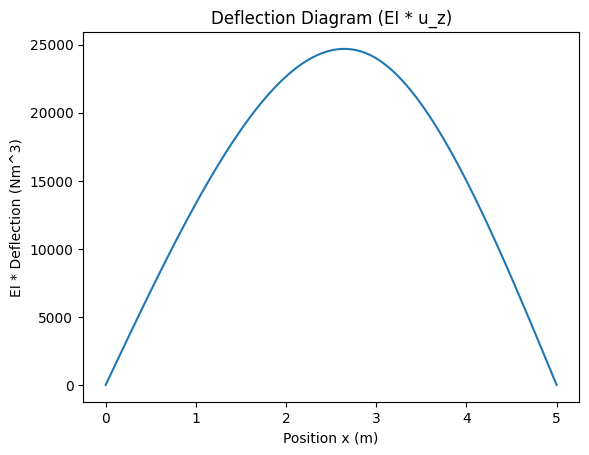

In [141]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the function
P = 10000  # N (as in the formula derivation)
a = 3  # m
b = 2  # m
l = a + b
x_values = np.linspace(0, l, 100)  # Create a vector of x positions

deflection_values = computeDeflectionN(x_values, P, a, b)

# Plot the deflection diagram
plt.figure()
plt.plot(x_values, deflection_values)
plt.xlabel("Position x (m)")
plt.ylabel("EI * Deflection (Nm^3)")
plt.title("Deflection Diagram (EI * u_z)")

plt.show()

In [142]:
# Evaluate the function

### Searching maxima

In [151]:
# Use this function:

max_deflection = np.max(deflection_values)

# Find the index of the maximum deflection value
max_deflection_index = np.argmax(deflection_values)

# Get the x-position corresponding to the maximum deflection
max_deflection_x = x_values[max_deflection_index]

# Print the maximum deflection and its position
print(f"Maximum deflection (EI * u_z): {max_deflection:.2f} Nm^3 at x = {max_deflection_x:.2f} m")



# scipy.optimize.fmin(func="naam_van_de_functie", x0 = "startwaarde")

def negative_deflection(x_pos):
  """Returns the negative of the deflection at a given position."""
  return -computeDeflectionN(np.array([x_pos]), P, a, b)[0]

# Use fmin to find the minimum of the negative_deflection function (which is the maximum of the deflection)
max_deflection_x_fmin = opt.fmin(negative_deflection, a)

# Calculate the maximum deflection value at the position found by fmin
max_deflection_fmin = computeDeflectionN(max_deflection_x_fmin, P, a, b)[0]

# Print the results
print(f"Maximum deflection (EI * u_z) found by fmin: {max_deflection_fmin:.2f} Nm^3 at x = {max_deflection_x_fmin[0]:.2f} m")



#use function of EIuz and integrate to find max.

# Calculate the theoretical position of maximum deflection
x_theoretical = np.sqrt((l**2 - b**2) / 3)

# Calculate the theoretical maximum deflection value at the theoretical position
deflection_theoretical = computeDeflectionN(np.array([x_theoretical]), P, a, b)[0]

# Print the theoretical maximum deflection and its position
print(f"Theoretical maximum deflection (EI * u_z): {deflection_theoretical:.2f} Nm^3 at x = {x_theoretical:.2f} m")

Maximum deflection (EI * u_z): 24691.67 Nm^3 at x = 1.57 m
Optimization terminated successfully.
         Current function value: -24693.678900
         Iterations: 14
         Function evaluations: 28
Maximum deflection (EI * u_z) found by fmin: 24693.68 Nm^3 at x = 2.65 m
Theoretical maximum deflection (EI * u_z): 24693.68 Nm^3 at x = 2.65 m


## 3.2 Continuous bar with different loads

### Function for general load

In [152]:
import numpy as np

def computeBendingMomentGeneral(x, L):
    # y = MMM(x,L)
    # Calculates the bending moment at positions defined by the x-array
    # for a continuous with loading characteristics specified in L equal to:
    # [load_type1 value1 a1;
    #  load_type2 value2 a2;
    #      ....   ]
    # where load_type is a string ('P', 'M', or 'q')

    M = np.zeros_like(x, dtype=float)

    for row in L:
        load_type, value, a = row

        if load_type == 'P':     # Puntlast (neerwaarts positief)

            M += np.where(x > a, -value * (x - a), 0)

        elif load_type == 'M':   # Puntmoment (positief met de klok mee boven balk)
            # Moment contribution is +M for x > a
            M += np.where(x > a, value, 0)
        elif load_type == 'q':   # Verdeelde last (positief omlaag)
            # Moment contribution is -q * <x - a>^2 / 2
            M += np.where(x > a, -value * (x - a)**2 / 2, 0)

    return M

The `computeBendingMomentGeneral` function calculates the bending moment along a beam for a general loading condition defined by the input matrix `L`. The matrix `L` should have rows representing individual loads and columns for the position of the load (`x`), point load (`P`), moment (`M`), and distributed load (`q`). The function iterates through each load in the matrix and adds its contribution to the total bending moment at each position in the input `x` vector. The contributions are calculated based on the provided basis functions, considering the sign conventions.

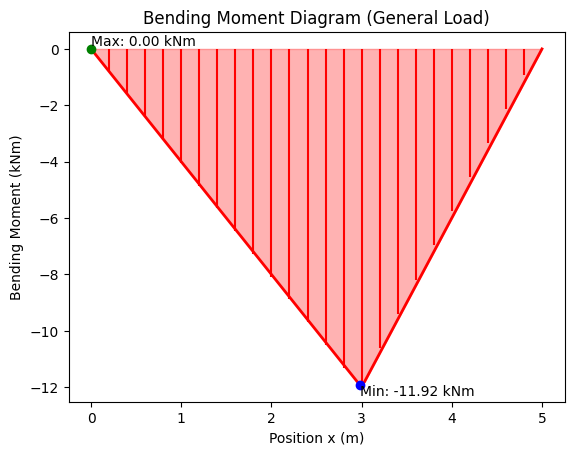

In [153]:
import numpy as np
import matplotlib.pyplot as plt

# Define the load matrix L for the simple point load case (Figure 3.1)
# P = 10 kN, a = 3 m, b = 2 m, l = a + b = 5 m
# Reactions: RA = P * b / l = 10 * 2 / 5 = 4 kN
#            RB = P * a / l = 10 * 3 / 5 = 6 kN
P_load = 10 # kN
a = 3 # m
b = 2 # m
l = a + b # m

RA = P_load * b / l
RB = P_load * a / l

# Load matrix L in the format [load_type_string, value, position]
L = np.array([
    ['P', RA, 0],      # Reaction at A (upward force is negative P)
    ['P', -P_load, a], # Point load P (downward force is positive P)
    ['P', RB, l]       # Reaction at B (upward force is negative P)
], dtype=object) # Use dtype=object to allow mixing strings and numbers


# Create a vector of x positions
x_values = np.linspace(0, l, 100)

# Calculate the bending moment using the general function
moment_values_general = computeBendingMomentGeneral(x_values, L)

# Plot the bending moment diagram with the desired layout
plt.figure()
plt.plot(x_values, moment_values_general, color='red', linewidth=2) # Red line, thicker

# Add vertical red solid lines from y=0 to the curve
# You can choose either 0.3 or 0.5 for the spacing
spacing = 0.2
line_x_positions = np.arange(0, l + spacing, spacing)
# Find the indices in x_values closest to the line_x_positions
indices = np.searchsorted(x_values, line_x_positions)
# Ensure indices are within bounds
indices = np.clip(indices, 0, len(x_values) - 1)
line_y_values = moment_values_general[indices]

plt.vlines(line_x_positions, 0, line_y_values, color='red')

# Fill the area under the curve with transparent red
plt.fill_between(x_values, moment_values_general, color='red', alpha=0.3)

# Find and display maximum and minimum values
max_moment = np.max(moment_values_general)
min_moment = np.min(moment_values_general)
max_index = np.argmax(moment_values_general)
min_index = np.argmin(moment_values_general)
max_x = x_values[max_index]
min_x = x_values[min_index]

plt.plot(max_x, max_moment, 'go') # Mark maximum with a green circle
plt.text(max_x, max_moment, f'Max: {max_moment:.2f} kNm', ha='left', va='bottom')

plt.plot(min_x, min_moment, 'bo') # Mark minimum with a blue circle
plt.text(min_x, min_moment, f'Min: {min_moment:.2f} kNm', ha='left', va='top')


plt.xlabel("Position x (m)")
plt.ylabel("Bending Moment (kNm)")
plt.title("Bending Moment Diagram (General Load)")
plt.show()

In [146]:
#nieuwe oefening


## Bereken reactiekrachten

### Subtask:
Bereken de onbekende reactiekrachten HA, VA en VB voor de gegeven balk met belastingen en steunpunten.


**Reasoning**:
I need to set up and solve the equilibrium equations to find the unknown reaction forces HA, VA, and VB. I will use the given loads and support conditions to formulate the equations for the sum of horizontal forces, sum of vertical forces, and sum of moments around a point. I will use Python to solve these equations.



In [154]:
from sympy import symbols, solve

# Define symbolic variables for the unknown reaction forces
HA, VA, VB = symbols('HA VA VB')

# Define the known loads and their positions
P1 = 4  # kN point load at x = 1m
M1 = 10 # kNm moment at x = 2m (counter-clockwise, so positive in moment equation)
q1 = 2  # kN/m distributed load from x = 4m to x = 6m
T1 = 2  # kN tensile force at x = 6m (horizontal)

# Beam length
L_beam = 6 # m

# Support positions
x_hinge = 0 # m (Hinge support at A)
x_roller = 3 # m (Roller support at B)

# Equilibrium equations:
# 1. Sum of horizontal forces = 0
# HA (to the right is positive) + T1 (to the right is positive) = 0
eq_horizontal = HA + T1

# 2. Sum of vertical forces = 0
# VA (upward is positive) + VB (upward is positive) - P1 (downward is positive) - distributed load (downward is positive) = 0
# The total vertical force from the distributed load is q1 * length of distributed load = 2 kN/m * (6m - 4m) = 4 kN
eq_vertical = VA + VB - P1 - q1 * (6 - 4)

# 3. Sum of moments around point A (hinge at x=0) = 0
# Assume counter-clockwise moments are positive.
# VA and HA do not create a moment around A as they act at A.
# - P1 * 1m (clockwise moment from P1)
# + M1 (counter-clockwise moment)
# - distributed load moment: The resultant of the distributed load is q1 * (6-4) = 4 kN, acting at the center of the distributed load, which is at (4m + 6m) / 2 = 5m from A. The moment is - (q1 * (6-4)) * 5m
# + VB * 3m (counter-clockwise moment from VB)
# T1 acts horizontally at x=6m, creating no vertical moment around A.
eq_moment_A = -P1 * 1 + M1 - (q1 * (6 - 4)) * 5 + VB * 3

# Solve the system of equations
solution = solve((eq_horizontal, eq_vertical, eq_moment_A), (HA, VA, VB))

# Extract the values of the reaction forces
HA_val = solution[HA]
VA_val = solution[VA]
VB_val = solution[VB]

# Print the results
print(f"Calculated reaction forces:")
print(f"HA = {HA_val:.2f} kN")
print(f"VA = {VA_val:.2f} kN")
print(f"VB = {VB_val:.2f} kN")

# Verification (Optional but good practice)
# Check if the calculated values satisfy the equilibrium equations
check_horizontal = HA_val + T1
check_vertical = VA_val + VB_val - P1 - q1 * (6 - 4)
check_moment_A = -P1 * 1 + M1 - (q1 * (6 - 4)) * 5 + VB_val * 3

print("\nVerification of equilibrium equations:")
print(f"Sum of horizontal forces: {check_horizontal:.6f}")
print(f"Sum of vertical forces: {check_vertical:.6f}")
print(f"Sum of moments around A: {check_moment_A:.6f}")

Calculated reaction forces:
HA = -2.00 kN
VA = 3.33 kN
VB = 4.67 kN

Verification of equilibrium equations:
Sum of horizontal forces: 0.000000
Sum of vertical forces: 0.000000
Sum of moments around A: 0.000000


## Stel de belastingmatrix l op

### Subtask:
Creëer de matrix L met alle relevante belastingen, inclusief de berekende reactiekrachten, in het formaat dat wordt verwacht door de `computeBendingMomentGeneral` functie (`[load_type_string, value, position]`). Houd rekening met de positie van de belastingen en de steunpunten. De trekkracht aan het einde van de balk is een axiale kracht en heeft geen invloed op het buigend moment; deze wordt dus niet opgenomen in de L-matrix voor het buigend moment.


**Reasoning**:
Create the load matrix L including the reaction forces and the applied loads, excluding axial forces, in the format required by the computeBendingMomentGeneral function.



In [155]:
# Ensure that VA and VB (calculated reaction forces) are available from a previous cell
# Also ensure P1, M1, q1, and L_beam are defined.

# 1. Define the length of the beam
# L_beam is already defined in the previous step where reaction forces were calculated.

# 2. Create a numpy array L with dtype object
# The format is [load_type_string, value, position]
# Upward forces are negative in the context of computeBendingMomentGeneral
# Clockwise moments are positive in the context of computeBendingMomentGeneral
# Downward distributed loads are positive in the context of computeBendingMomentGeneral
# Use the numerical values of the reaction forces (VA_val, VB_val)
L = np.array([
    ['P', -VA_val, 0],      # Vertical Reaction at A (upward is negative)
    ['P', P1, 1],       # Point load P1 (downward is positive)
    ['M', -M1, 2],      # Moment M1 (counter-clockwise is positive in equilibrium, but should be negative for the basis function)
    ['P', -VB_val, 3],      # Vertical Reaction at B (upward is negative)
    ['q', q1, 4],       # Distributed load q1 starting at x = 4m (downward is positive)
    # Note: The distributed load in computeBendingMomentGeneral is handled as if it starts at 'a'
    # and applies to x > a. For a distributed load from 4m to 6m, we model it as a distributed
    # load starting at 4m. However, the function currently applies it from 'a' to the end of the beam.
    # A more accurate representation for a distributed load over a specific segment would require
    # a modification of the computeBendingMomentGeneral function or a different approach.
    # Based on the current function's behavior, we'll include 'q', q1, 4.
    # The effect of the distributed load ending at 6m is implicitly handled by the equilibrium,
    # but the bending moment calculation using this function might not be perfectly accurate for
    # a distributed load that stops before the end of the beam without further adjustments.
    # For this subtask, we will follow the instruction to include the distributed load starting at 4m.
], dtype=object)

# 3. Print the resulting matrix L (optional, for verification)
print("Load matrix L:")
print(L)

Load matrix L:
[['P' -10/3 0]
 ['P' 4 1]
 ['M' -10 2]
 ['P' -14/3 3]
 ['q' 2 4]]


## Maak een vector x

### Subtask:
Genereer een numpy array `x` met posities over de gehele lengte van de balk met een geschikte stapgrootte.


**Reasoning**:
Generate a numpy array `x_values` covering the length of the beam with a sufficient number of points for plotting.



In [156]:
# Determine the length of the beam from the variable L_beam.
# L_beam is already defined in the previous steps.

# Use np.linspace() to create an array named x_values.
# The array should start at 0, end at L_beam, and contain a sufficient number of points (e.g., 200 or more).
x_values = np.linspace(0, L_beam, 200)


## Bereken buigend moment

### Subtask:
Gebruik de `computeBendingMomentGeneral` functie met de vector `x` en de matrix `L` om het buigend moment op alle posities te berekenen.

**Reasoning**:
Call the `computeBendingMomentGeneral` function with the `x_values` and `L` arrays to calculate the bending moment values and store the result. Then print a few values to verify.

In [157]:
# Call the computeBendingMomentGeneral function
# Ensure x_values and L are available from previous cells
moment_values_calculated = computeBendingMomentGeneral(x_values, L)

# Print the first few calculated moment values for verification (optional)
print("First 10 calculated bending moment values:")
print(moment_values_calculated[:10])

# Print the last few calculated moment values for verification (optional)
print("\nLast 10 calculated bending moment values:")
print(moment_values_calculated[-10:])

First 10 calculated bending moment values:
[0.         0.10050251 0.20100503 0.30150754 0.40201005 0.50251256
 0.60301508 0.70351759 0.8040201  0.90452261]

Last 10 calculated bending moment values:
[-0.0736345  -0.05818035 -0.04454433 -0.03272645 -0.0227267  -0.01454509
 -0.00818161 -0.00363627 -0.00090907  0.        ]


## Plot buigend moment

### Subtask:
Plot het berekende buigende moment tegen de posities `x`. Zorg voor duidelijke labels en een titel.


**Reasoning**:
Plot the calculated bending moment values against the positions, add labels, a title, and a grid as requested in the instructions.



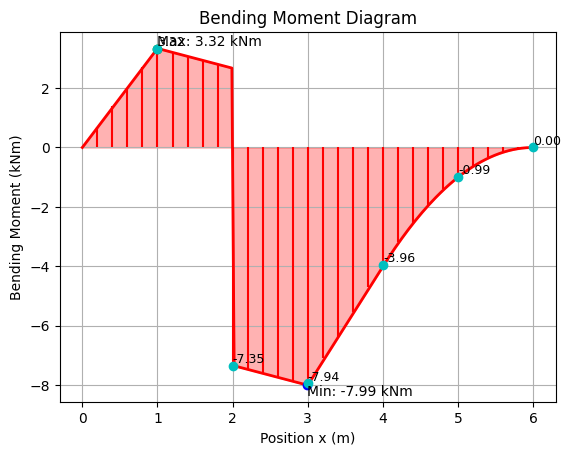

In [158]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy for array operations

# Ensure x_values and moment_values_calculated are available from previous cells
# Also ensure L_beam is defined for the total length

plt.figure()
plt.plot(x_values, moment_values_calculated, color='red', linewidth=2) # Red line, thicker

# Add vertical red solid lines from y=0 to the curve
# You can choose either 0.3 or 0.5 for the spacing
spacing = 0.2 # You can adjust this spacing
line_x_positions = np.arange(0, L_beam + spacing, spacing) # Use L_beam for the total length
# Find the indices in x_values closest to the line_x_positions
indices = np.searchsorted(x_values, line_x_positions)
# Ensure indices are within bounds
indices = np.clip(indices, 0, len(x_values) - 1)
line_y_values = moment_values_calculated[indices]

plt.vlines(line_x_positions, 0, line_y_values, color='red')

# Fill the area under the curve with transparent red
plt.fill_between(x_values, moment_values_calculated, color='red', alpha=0.3)

# Find and display maximum and minimum values
max_moment = np.max(moment_values_calculated)
min_moment = np.min(moment_values_calculated)
max_index = np.argmax(moment_values_calculated)
min_index = np.argmin(moment_values_calculated)
max_x = x_values[max_index]
min_x = x_values[min_index]

plt.plot(max_x, max_moment, 'go') # Mark maximum with a green circle
plt.text(max_x, max_moment, f'Max: {max_moment:.2f} kNm', ha='left', va='bottom')

plt.plot(min_x, min_moment, 'bo') # Mark minimum with a blue circle
plt.text(min_x, min_moment, f'Min: {min_moment:.2f} kNm', ha='left', va='top')

# Add markers and labels at each meter mark
meter_marks_x = np.arange(1, int(L_beam) + 1) # Positions at every meter (1, 2, ..., L_beam)
# Find the indices in x_values closest to the meter_marks_x
meter_indices = np.searchsorted(x_values, meter_marks_x)
# Ensure indices are within bounds
meter_indices = np.clip(meter_indices, 0, len(x_values) - 1)
meter_marks_y = moment_values_calculated[meter_indices]

plt.plot(meter_marks_x, meter_marks_y, 'co') # Mark meter marks with a cyan circle

# Add text labels for the meter marks
for i, x_pos in enumerate(meter_marks_x):
    plt.text(x_pos, meter_marks_y[i], f'{meter_marks_y[i]:.2f}', ha='left', va='bottom', fontsize=9)


plt.xlabel("Position x (m)")
plt.ylabel("Bending Moment (kNm)")
plt.title("Bending Moment Diagram")
plt.grid(True)
plt.show()

## 3.3 Integration constants and boundary conditions

### Determining boundary conditions and calculating deflection

In [159]:
import numpy as np

def alpha_C1(x: np.array, L: np.array) -> np.array:
    """
    Calculates the part of EI*alpha(x) that depends on the loading (L),
    excluding the C1 term.

    Args:
        x (np.array): A numpy array of positions along the beam.
        L (np.array): A numpy array representing the loading on the beam.
                      Format: [[load_type1, value1, position1], ...]
                      load_type can be 'P' (point load), 'M' (moment), or 'q' (distributed load).

    Returns:
        np.array: A numpy array containing the calculated loading-dependent
                  part of EI*alpha(x) at each position in x.
    """
    # EI*alpha(x) = Integral(M(x) dx) + C1
    # We calculate the Integral(M(x) dx) part here based on basis functions
    # M_load(x > a) contributes Integral(M_load(x-a) dx) for x > a

    ei_alpha_load = np.zeros_like(x, dtype=float)

    for row in L:
        load_type, value, a = row

        if load_type == 'P':     # Puntlast (neerwaarts positief)
            # Integral of moment contribution: Integral(-P * <x - a>^1) dx = -P * <x - a>^2 / 2
            ei_alpha_load += np.where(x > a, -value * (x - a)**2 / 2, 0)
        elif load_type == 'M':   # Puntmoment (positief met de klok mee boven balk)
            # Integral of moment contribution: Integral(+M * <x - a>^0) dx = +M * <x - a>^1
            ei_alpha_load += np.where(x > a, value * (x - a), 0)
        elif load_type == 'q':   # Verdeelde last (positief omlaag)
            # Integral of moment contribution: Integral(-q * <x - a>^2 / 2) dx = -q * <x - a>^3 / 6
            ei_alpha_load += np.where(x > a, -value * (x - a)**3 / 6, 0)

    return ei_alpha_load

In [160]:
import numpy as np

def uz_C1C2(x: np.array, L: np.array) -> np.array:
    """
    Calculates the part of EI*uz(x) that depends on the loading (L),
    excluding the C1*x + C2 terms.

    Args:
        x (np.array): A numpy array of positions along the beam.
        L (np.array): A numpy array representing the loading on the beam.
                      Format: [[load_type1, value1, position1], ...]
                      load_type can be 'P' (point load), 'M' (moment), or 'q' (distributed load).

    Returns:
        np.array: A numpy array containing the calculated loading-dependent
                  part of EI*uz(x) at each position in x.
    """
    # EI*uz(x) = Integral(Integral(M(x) dx) dx) + C1*x + C2
    # We calculate the Integral(Integral(M(x) dx) dx) part here based on basis functions
    # M_load(x > a) contributes Integral(Integral(M_load(x-a) dx) dx) for x > a

    ei_uz_load = np.zeros_like(x, dtype=float)

    for row in L:
        load_type, value, a = row
        value = float(value) # Explicitly convert value to float
        a = float(a) # Explicitly convert position to float (though usually positions are floats/integers)


        if load_type == 'P':     # Puntlast (neerwaarts positief)
            # Double Integral of moment contribution: -P * <x - a>^3 / 6
            ei_uz_load += np.where(x > a, -value * (x - a)**3 / 6, 0)
        elif load_type == 'M':   # Puntmoment (positief met de klok mee boven balk)
            # Double Integral of moment contribution: +M * <x - a>^2 / 2
            ei_uz_load += np.where(x > a, value * (x - a)**2 / 2, 0)
        elif load_type == 'q':   # Verdeelde last (positief omlaag)
            # Double Integral of moment contribution: -q * <x - a>^4 / 24
            ei_uz_load += np.where(x > a, -value * (x - a)**4 / 24, 0)

    return ei_uz_load # Corrected variable name in return statement

In [161]:
import numpy as np
from sympy import symbols, solve

def computeDeflectionBC(x: np.array, L: np.array, BC: np.array) -> np.array:
    """
    Berekent de doorbuiging (EI*uz) voor een balk met algemene belasting (L)
    en gegeven randvoorwaarden (BC).

    Args:
        x (np.array): Een numpy array met posities langs de balk.
        L (np.array): Een numpy array dat de belasting op de balk voorstelt.
                      Formaat: [[belasting_type1, waarde1, positie1], ...]
                      belasting_type kan 'P', 'M' of 'q' zijn.
        BC (np.array): Een numpy array dat de randvoorwaarden voorstelt.
                       Formaat: [[positie1, type1], [positie2, type2]]
                       type kan 1 zijn (alpha=0) of 2 (uz=0).
                       Er wordt uitgegaan van 2 opgegeven randvoorwaarden.

    Returns:
        np.array: Een numpy array met de berekende EI*uz(x) op elke positie in x.
    """
    # --- STAP 1: Bepaal C1 en C2 op basis van randvoorwaarden ---

    C1, C2 = symbols('C1 C2')
    C1_val = 0
    C2_val = 0

    if len(BC) == 2:
        bc1_pos, bc1_type = BC[0]
        bc2_pos, bc2_type = BC[1]

        # Geval 1: Hoek en doorbuiging op één punt (uz(x1)=0, alpha(x1)=0)
        # De tekst beschrijft dit als BC = [[x1, 1], [x1, 2]] - volgorde kan variëren
        # Controleer of beide randvoorwaarden op dezelfde positie zijn en één type 1 (alpha=0) en de andere type 2 (uz=0) is
        if bc1_pos == bc2_pos and ((bc1_type == 1 and bc2_type == 2) or (bc1_type == 2 and bc2_type == 1)):
            x1 = bc1_pos # De positie van de randvoorwaarden

            # Uit alpha(x1) = 0: alpha_C1(x1, L) + C1 = 0  => C1 = -alpha_C1(x1, L)
            # Zorg ervoor dat alpha_C1 gedefinieerd is in een vorige cel
            C1_val = -alpha_C1(np.array([x1]), L)[0]

            # Uit uz(x1) = 0: uz_C1C2(x1, L) + C1*x1 + C2 = 0 => C2 = -uz_C1C2(x1, L) - C1*x1
            # Zorg ervoor dat uz_C1C2 gedefinieerd is in een vorige cel
            C2_val = -uz_C1C2(np.array([x1]), L)[0] - C1_val * x1

            print(f"Geval 1: Bepaalde C1 = {C1_val}, C2 = {C2_val} op basis van hoek en doorbuiging op x = {x1}")

        # Geval 2: Doorbuiging op twee punten (uz(x1)=0, uz(x2)=0)
        # Controleer of beide randvoorwaarden type 2 (uz=0) zijn en op verschillende posities
        elif bc1_type == 2 and bc2_type == 2 and bc1_pos != bc2_pos:
            x1 = bc1_pos
            x2 = bc2_pos

            # Vergelijking 1: uz(x1) = 0 => uz_C1C2(x1, L) + C1*x1 + C2 = 0
            # Zorg ervoor dat uz_C1C2 gedefinieerd is in een vorige cel
            eq1 = uz_C1C2(np.array([x1]), L)[0] + C1 * x1 + C2

            # Vergelijking 2: uz(x2) = 0 => uz_C1C2(x2, L) + C1*x2 + C2 = 0
            # Zorg ervoor dat uz_C1C2 gedefinieerd is in een vorige cel
            eq2 = uz_C1C2(np.array([x2]), L)[0] + C1 * x2 + C2

            # Los het stelsel van twee vergelijkingen op voor C1 en C2
            equations = [eq1, eq2]
            unknowns = [C1, C2]
            try:
                solution = solve(equations, unknowns)
                C1_val = solution.get(C1, 0)
                C2_val = solution.get(C2, 0)
                print(f"Geval 2: Bepaalde C1 = {C1_val}, C2 = {C2_val} op basis van doorbuiging op x = {x1} en x = {x2}")
            except Exception as e:
                print(f"Fout bij het oplossen voor C1 en C2: {e}")
                return np.zeros_like(x)

        else:
             print("Fout: Niet-ondersteunde combinatie of aantal randvoorwaarden opgegeven (verwacht 2 randvoorwaarden die overeenkomen met Geval 1 of Geval 2).")
             return np.zeros_like(x)

    elif len(BC) == 1: # Behandel expliciet het geval met slechts één randvoorwaarde
        print("Waarschuwing: Slechts één randvoorwaarde opgegeven. Kan C1 en C2 niet eenduidig bepalen zonder verdere aannames.")
        # Behandel enkelvoudige randvoorwaarde indien nodig, maar de tekst richt zich op 2 BC's voor C1/C2
        return np.zeros_like(x) # Retourneer nul doorbuiging aangezien C1 en C2 niet beide kunnen worden opgelost

    else:
        print("Fout: Niet-ondersteund aantal randvoorwaarden opgegeven (verwacht 1 of 2).")
        return np.zeros_like(x)


    # --- STAP 2: Bereken doorbuiging uz met de bepaalde C1 en C2 ---

    # EI*uz(x) = uz_C1C2(x, L) + C1_val*x + C2_val
    ei_uz = uz_C1C2(x, L) + C1_val * x + C2_val

    return ei_uz

# Opmerking: De functies alpha_C1 en uz_C1C2 moeten gedefinieerd en beschikbaar zijn
# in vorige cellen om deze functie correct te laten werken.

## Berekenen en plotten van de doorbuiging met randvoorwaarden

### Subtask:
Gebruik de `computeDeflectionBC` functie om de doorbuiging te berekenen en te plotten voor een balk met een specifieke belasting en randvoorwaarden.

**Reasoning**:
Define the load matrix L and boundary condition matrix BC for a specific problem, create a vector of x positions, use the `computeDeflectionBC` function to calculate the deflection, and plot the result.

Geval 2: Bepaalde C1 = -1.55555555555556, C2 = 0.0 op basis van doorbuiging op x = 0 en x = 3


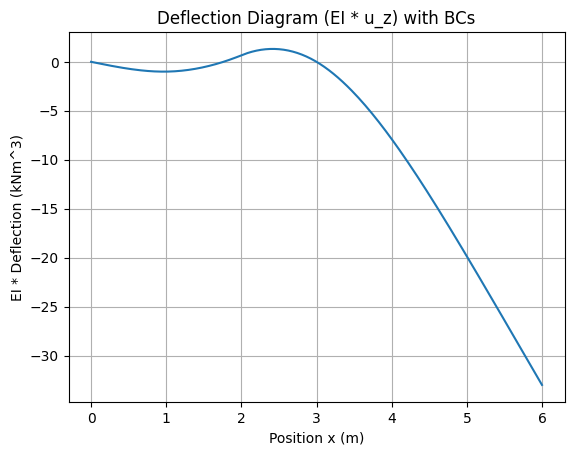

In [162]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure L_beam, P1, M1, q1, VA_val, VB_val are defined from previous reaction force calculation

# 1. Define the Load matrix L (reusing the matrix from the previous bending moment exercise)
# Format: [load_type_string, value, position]
# Upward forces are negative, clockwise moments are positive, downward distributed loads are positive
L = np.array([
    ['P', -VA_val, 0],      # Vertical Reaction at A (upward is negative)
    ['P', P1, 1],       # Point load P1 (downward is positive)
    ['M', -M1, 2],      # Moment M1 (counter-clockwise is negative for the basis function)
    ['P', -VB_val, 3],      # Vertical Reaction at B (upward is negative)
    ['q', q1, 4],       # Distributed load q1 starting at x = 4m (downward is positive)
], dtype=object)

# 2. Define the Boundary Condition matrix BC for a simply supported beam
# Boundary conditions: uz=0 at x=0 and uz=0 at x=L_beam (hinge at 0, roller at 3, but deflection is 0 at both supports)
# Support A is at x=0, Support B is at x=3
BC = np.array([
    [0, 2], # Deflection (type 2) is zero at x = 0 (Support A)
    [3, 2]  # Deflection (type 2) is zero at x = 3 (Support B)
])

# 3. Create a vector of x positions (reusing x_values from previous steps)
# Ensure x_values and L_beam are defined

# x_values = np.linspace(0, L_beam, 200) # Define if not already available

# 4. Calculate the deflection using the computeDeflectionBC function
# Ensure computeDeflectionBC, alpha_C1, and uz_C1C2 are defined in previous cells
deflection_values_bc = computeDeflectionBC(x_values, L, BC)

# 5. Plot the deflection diagram
plt.figure()
plt.plot(x_values, deflection_values_bc)
plt.xlabel("Position x (m)")
plt.ylabel("EI * Deflection (kNm^3)") # Units depend on L and BC values, kNm^3 if L is in kN, m, kNm
plt.title("Deflection Diagram (EI * u_z) with BCs")
plt.grid(True)
plt.show()

## **Oefening 2 buigend moment + doorbuiging **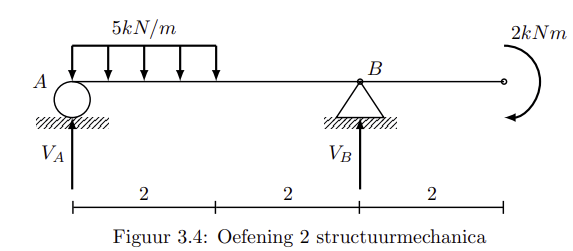

## Bereken reactiekrachten

### Subtask:
Bereken de onbekende reactiekrachten (VA, VB) voor de gegeven balk met de verdeelde last en het moment. Er zijn geen horizontale krachten, dus HA zal nul zijn.


**Reasoning**:
Import necessary libraries and define symbolic variables for reaction forces and known loads and positions.



In [165]:
from sympy import symbols, solve
import numpy as np

# Define symbolic variables for the unknown reaction forces
VA, VB = symbols('VA VB')

# Define the known loads and their positions
q_value = 5  # kN/m distributed load
q_start_pos = 0  # m
q_end_pos = 2  # m
M_value = 2  # kNm moment
M_pos = 6  # m

# Beam length
L_beam = 6 # m

# Support positions
x_hinge = 0 # m (Hinge support at A)
x_roller = 4 # m (Roller support at B)

**Reasoning**:
Set up and solve the equilibrium equations for vertical forces and moments to find VA and VB.



In [166]:
# Equilibrium equations:
# 1. Sum of vertical forces = 0
# VA (upward is positive) + VB (upward is positive) - distributed load (downward is positive) = 0
# The total vertical force from the distributed load is q_value * length of distributed load = 5 kN/m * (2m - 0m) = 10 kN
eq_vertical = VA + VB - q_value * (q_end_pos - q_start_pos)

# 2. Sum of moments around point A (hinge at x=0) = 0
# Assume counter-clockwise moments are positive.
# VA does not create a moment around A as it acts at A.
# - distributed load moment: The resultant of the distributed load is q_value * (q_end_pos - q_start_pos) = 10 kN, acting at the center of the distributed load, which is at (0m + 2m) / 2 = 1m from A. The moment is - (q_value * (q_end_pos - q_start_pos)) * 1m
# + VB * 4m (counter-clockwise moment from VB)
# - M_value (clockwise moment at x=6m)
eq_moment_A = - (q_value * (q_end_pos - q_start_pos)) * (q_start_pos + (q_end_pos - q_start_pos)/2) + VB * x_roller - M_value


# Solve the system of equations
solution = solve((eq_vertical, eq_moment_A), (VA, VB))

# Extract the values of the reaction forces
VA_val = solution[VA]
VB_val = solution[VB]

# Print the results
print(f"Calculated reaction forces:")
print(f"VA = {VA_val:.2f} kN")
print(f"VB = {VB_val:.2f} kN")

# Verification (Optional but good practice)
# Check if the calculated values satisfy the equilibrium equations
check_vertical = VA_val + VB_val - q_value * (q_end_pos - q_start_pos)
check_moment_A = - (q_value * (q_end_pos - q_start_pos)) * (q_start_pos + (q_end_pos - q_start_pos)/2) + VB_val * x_roller - M_value


print("\nVerification of equilibrium equations:")
print(f"Sum of vertical forces: {check_vertical:.6f}")
print(f"Sum of moments around A: {check_moment_A:.6f}")

Calculated reaction forces:
VA = 7.00 kN
VB = 3.00 kN

Verification of equilibrium equations:
Sum of vertical forces: 0.000000
Sum of moments around A: 0.000000


## Stel de belastingmatrix l op

### Subtask:
Creëer de matrix L met alle relevante belastingen, inclusief de berekende reactiekrachten, in het formaat dat wordt verwacht door de `computeBendingMomentGeneral` functie (`[load_type_string, value, position]`). Houd rekening met de posities van de belastingen en de steunpunten.


**Reasoning**:
Create the load matrix L including the reaction forces and the applied loads, excluding axial forces, in the format required by the computeBendingMomentGeneral function.



In [189]:
# 1. Define the length of the beam
# L_beam is already defined in the previous step where reaction forces were calculated.

# 2. Create a numpy array L with dtype object
# The format is [load_type_string, value, position]
# Upward forces are negative in the context of computeBendingMomentGeneral
# Clockwise moments are positive in the context of computeBendingMomentGeneral
# Downward distributed loads are positive in the context of computeBendingMomentGeneral
# Use the numerical values of the reaction forces (VA_val, VB_val)

# Ensure VA_val, VB_val, q_value, q_start_pos, M_value, M_pos are available from previous cells.
# Also ensure L_beam is defined.

L = np.array([
    ['P', -VA_val, x_hinge],      # Vertical Reaction at A (upward is negative)
    ['q', q_value, q_start_pos],       # Distributed load q1 starting at x = 0m (downward is positive)
    ['q', -q_value, q_end_pos],    # Upward distributed load starting at x = 2m to end the distributed load
    ['P', -VB_val, x_roller],      # Vertical Reaction at B (upward is negative)
    ['M', M_value, M_pos],      # Moment M1 (clockwise is positive for the basis function)
], dtype=object)

# 3. Print the resulting matrix L (optional, for verification)
print("Load matrix L:")
print(L)

Load matrix L:
[['P' -7.00000000000000 0]
 ['q' 5 0]
 ['q' -5 2]
 ['P' -3.00000000000000 4]
 ['M' 2 6]]


## Maak een vector x

### Subtask:
Genereer een numpy array `x` met posities over de gehele lengte van de balk (0m tot 6m) met een geschikte stapgrootte.


**Reasoning**:
Generate a numpy array `x_values` covering the length of the beam with a sufficient number of points for plotting.



In [190]:
# Determine the length of the beam from the variable L_beam.
# L_beam is already defined in the previous steps.

# Use np.linspace() to create an array named x_values.
# The array should start at 0, end at L_beam, and contain a sufficient number of points (e.g., 200 or more).
x_values = np.linspace(0, L_beam, 200)

## Bereken en plot buigend moment

### Subtask:
Gebruik de functie `computeBendingMomentGeneral` met de vector `x` en de matrix `L` om het buigend moment op alle posities te berekenen en plot de momentenlijn met de gewenste layout.


**Reasoning**:
Call the computeBendingMomentGeneral function with the x_values and L arrays to calculate the bending moment values and store the result, then plot the calculated bending moment values against the positions with the specified formatting.



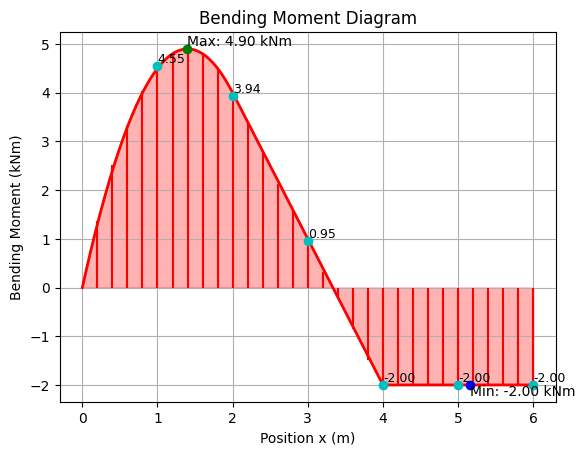

In [191]:
# Ensure x_values and L are available from previous cells
# Ensure L_beam is defined for the total length

# 1. Calculate the bending moment using the general function
moment_values_calculated = computeBendingMomentGeneral(x_values, L)

# 2. Plot the bending moment diagram with the desired layout
plt.figure()
plt.plot(x_values, moment_values_calculated, color='red', linewidth=2) # Red line, thicker

# 3. Add vertical red solid lines from y=0 to the curve
# You can choose either 0.3 or 0.5 for the spacing
spacing = 0.2 # You can adjust this spacing
line_x_positions = np.arange(0, L_beam + spacing, spacing) # Use L_beam for the total length
# Find the indices in x_values closest to the line_x_positions
indices = np.searchsorted(x_values, line_x_positions)
# Ensure indices are within bounds
indices = np.clip(indices, 0, len(x_values) - 1)
line_y_values = moment_values_calculated[indices]

plt.vlines(line_x_positions, 0, line_y_values, color='red')

# 4. Fill the area under the curve with transparent red
plt.fill_between(x_values, moment_values_calculated, color='red', alpha=0.3)

# 5. Find and display maximum and minimum values
max_moment = np.max(moment_values_calculated)
min_moment = np.min(moment_values_calculated)
max_index = np.argmax(moment_values_calculated)
min_index = np.argmin(moment_values_calculated)
max_x = x_values[max_index]
min_x = x_values[min_index]

# 6. Mark maximum with a green circle and add text label
plt.plot(max_x, max_moment, 'go')
plt.text(max_x, max_moment, f'Max: {max_moment:.2f} kNm', ha='left', va='bottom')

# 7. Mark minimum with a blue circle and add text label
plt.plot(min_x, min_moment, 'bo')
plt.text(min_x, min_moment, f'Min: {min_moment:.2f} kNm', ha='left', va='top')

# 8. Add markers and labels at each meter mark
meter_marks_x = np.arange(1, int(L_beam) + 1) # Positions at every meter (1, 2, ..., L_beam)
# Find the indices in x_values closest to the meter_marks_x
meter_indices = np.searchsorted(x_values, meter_marks_x)
# Ensure indices are within bounds
meter_indices = np.clip(meter_indices, 0, len(x_values) - 1)
meter_marks_y = moment_values_calculated[meter_indices]

plt.plot(meter_marks_x, meter_marks_y, 'co') # Mark meter marks with a cyan circle

# Add text labels for the meter marks
for i, x_pos in enumerate(meter_marks_x):
    plt.text(x_pos, meter_marks_y[i], f'{meter_marks_y[i]:.2f}', ha='left', va='bottom', fontsize=9)

# 9. Add labels and title
plt.xlabel("Position x (m)")
plt.ylabel("Bending Moment (kNm)")
plt.title("Bending Moment Diagram")

# 10. Add a grid
plt.grid(True)

# 11. Show the plot
plt.show()

## Bepaal integratieconstanten met `computedeflectionbc`

### Subtask:
Definieer de randvoorwaarden (BC matrix) voor de gegeven ondersteuning (doorbuiging is nul bij de steunpunten op 0m en 4m). Gebruik de functie `computeDeflectionBC` met de vector `x`, de matrix `L` en de matrix `BC` om de doorbuiging te berekenen. De functie zal intern de integratieconstanten C1 en C2 bepalen. Noteer de waarden van C1 en C2 die de functie berekent (de functie print deze als het goed is).


**Reasoning**:
Define the BC matrix, call computeDeflectionBC to calculate deflection and determine C1 and C2, and print the calculated deflection values.



In [192]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure x_values and L are available from previous cells
# Ensure L_beam is defined for the total length
# Ensure computeDeflectionBC is defined

# 1. Define the Boundary Condition matrix BC
# Supports at x=0m (hinge) and x=4m (roller). Deflection is zero at both supports.
BC = np.array([
    [0, 2], # Deflection (type 2) is zero at x = 0
    [4, 2]  # Deflection (type 2) is zero at x = 4
])

# 2. Calculate the deflection using the computeDeflectionBC function
# This function will print the calculated C1 and C2 values.
deflection_values_bc = computeDeflectionBC(x_values, L, BC)

# 3. Print the first few calculated deflection values for verification (optional)
print("\nFirst 10 calculated deflection values (EI * u_z):")
print(deflection_values_bc[:10])

# 4. Print the last few calculated deflection values for verification (optional)
print("\nLast 10 calculated deflection values (EI * u_z):")
print(deflection_values_bc[-10:])

Geval 2: Bepaalde C1 = -6.16666666666667, C2 = 0.0 op basis van doorbuiging op x = 0 en x = 4

First 10 calculated deflection values (EI * u_z):
[0 -0.185897843144147 -0.371606233046842 -0.556939504154124
 -0.741716122934744 -0.925758687880166 -1.10889392950457 -1.29095271034486
 -1.47177002496062 -1.65118499993420]

Last 10 calculated deflection values (EI * u_z):
[2.48582948242044 2.47615800947784 2.46466840062961 2.45136065587573
 2.43623477521613 2.41929075865085 2.40052860617999 2.37994831780338
 2.35754989352117 2.33333333333334]


**Reasoning**:
Plot the calculated deflection values against the positions, add labels, a title, and a grid as requested.



Geval 2: Bepaalde C1 = -6.16666666666667, C2 = 0.0 op basis van doorbuiging op x = 0 en x = 4


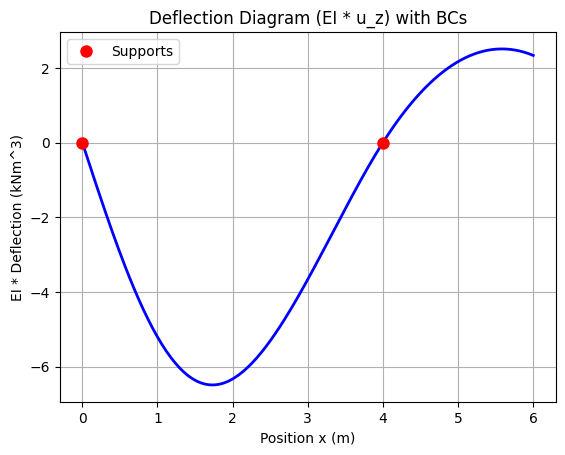

In [193]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure x_values and deflection_values_bc are available from previous cells
# Ensure L_beam is defined for the total length

plt.figure()
plt.plot(x_values, deflection_values_bc, color='blue', linewidth=2) # Blue line, thicker

# Add labels and title
plt.xlabel("Position x (m)")
plt.ylabel("EI * Deflection (kNm^3)") # Units depend on L and BC values
plt.title("Deflection Diagram (EI * u_z) with BCs")

# Add grid
plt.grid(True)

# Add support locations with markers
# Supports are at x=0 and x=4
support_x = np.array([0, 4])
# Find the deflection values at the support locations
support_y = computeDeflectionBC(support_x, L, BC)
plt.plot(support_x, support_y, 'ro', markersize=8, label='Supports') # Red circles for supports
plt.legend() # Show the legend

# Show the plot
plt.show()

## Bepaal integratieconstanten manueel

### Subtask:
Bepaal de integratieconstanten C1 en C2 manueel door de randvoorwaarden toe te passen op de algemene vergelijkingen voor EIα en EIuz (vergelijkingen 3.2 en 3.3, aangepast voor de algemene belasting) en het resulterende stelsel op te lossen.


**Reasoning**:
Define symbolic variables and the general equations for EI*alpha and EI*uz including the loading-dependent parts and integration constants. Then, apply the boundary conditions (uz=0 at x=0 and x=4) to form two equations. Finally, solve these equations for C1 and C2 and print the results.



**Reasoning**:
The previous code failed because I used the symbolic variable `C2` directly instead of `C2_sym` in the equation definition. I need to fix this typo and re-execute the code to calculate and print the manual values of C1 and C2.



In [195]:
from sympy import symbols, solve
import numpy as np

# Ensure L is available from previous cells

# 1. Define symbolic variables
x_sym, C1_sym, C2_sym = symbols('x C1 C2')

# 2. Express the general equations for EI*alpha(x_sym) and EI*uz(x_sym)
# These equations include the loading-dependent parts (evaluated using the numpy functions)
# and the symbolic integration constants.

# Evaluate the loading-dependent parts at the specific x values of the boundary conditions.
# Need to ensure uz_C1C2 is defined in a previous cell.

# Boundary conditions: uz(0) = 0 and uz(4) = 0

# Evaluate the loading-dependent part of uz at x=0
uz_load_at_0 = uz_C1C2(np.array([0]), L)[0]

# Evaluate the loading-dependent part of uz at x=4
uz_load_at_4 = uz_C1C2(np.array([4]), L)[0]

# 3. Formulate the equations from the boundary conditions
# EI*uz(x) = uz_C1C2(x, L) + C1*x + C2
# At x = 0: uz_load_at_0 + C1*0 + C2 = 0
eq1 = uz_load_at_0 + C2_sym # Use C2_sym instead of C2

# At x = 4: uz_load_at_4 + C1*4 + C2 = 0
eq2 = uz_load_at_4 + C1_sym * 4 + C2_sym

# 4. Solve the system of equations for C1_sym and C2_sym
solution_manual = solve((eq1, eq2), (C1_sym, C2_sym))

# Extract the values of the integration constants
C1_manual = solution_manual[C1_sym]
C2_manual = solution_manual[C2_sym]

# 5. Print the calculated manual values of C1 and C2
print(f"Manually calculated integration constants:")
print(f"C1 = {C1_manual}")
print(f"C2 = {C2_manual}")

Manually calculated integration constants:
C1 = -6.16666666666667
C2 = 0.0
